train_score:  0.8664614200500289
test_score:  0.8615384615384616


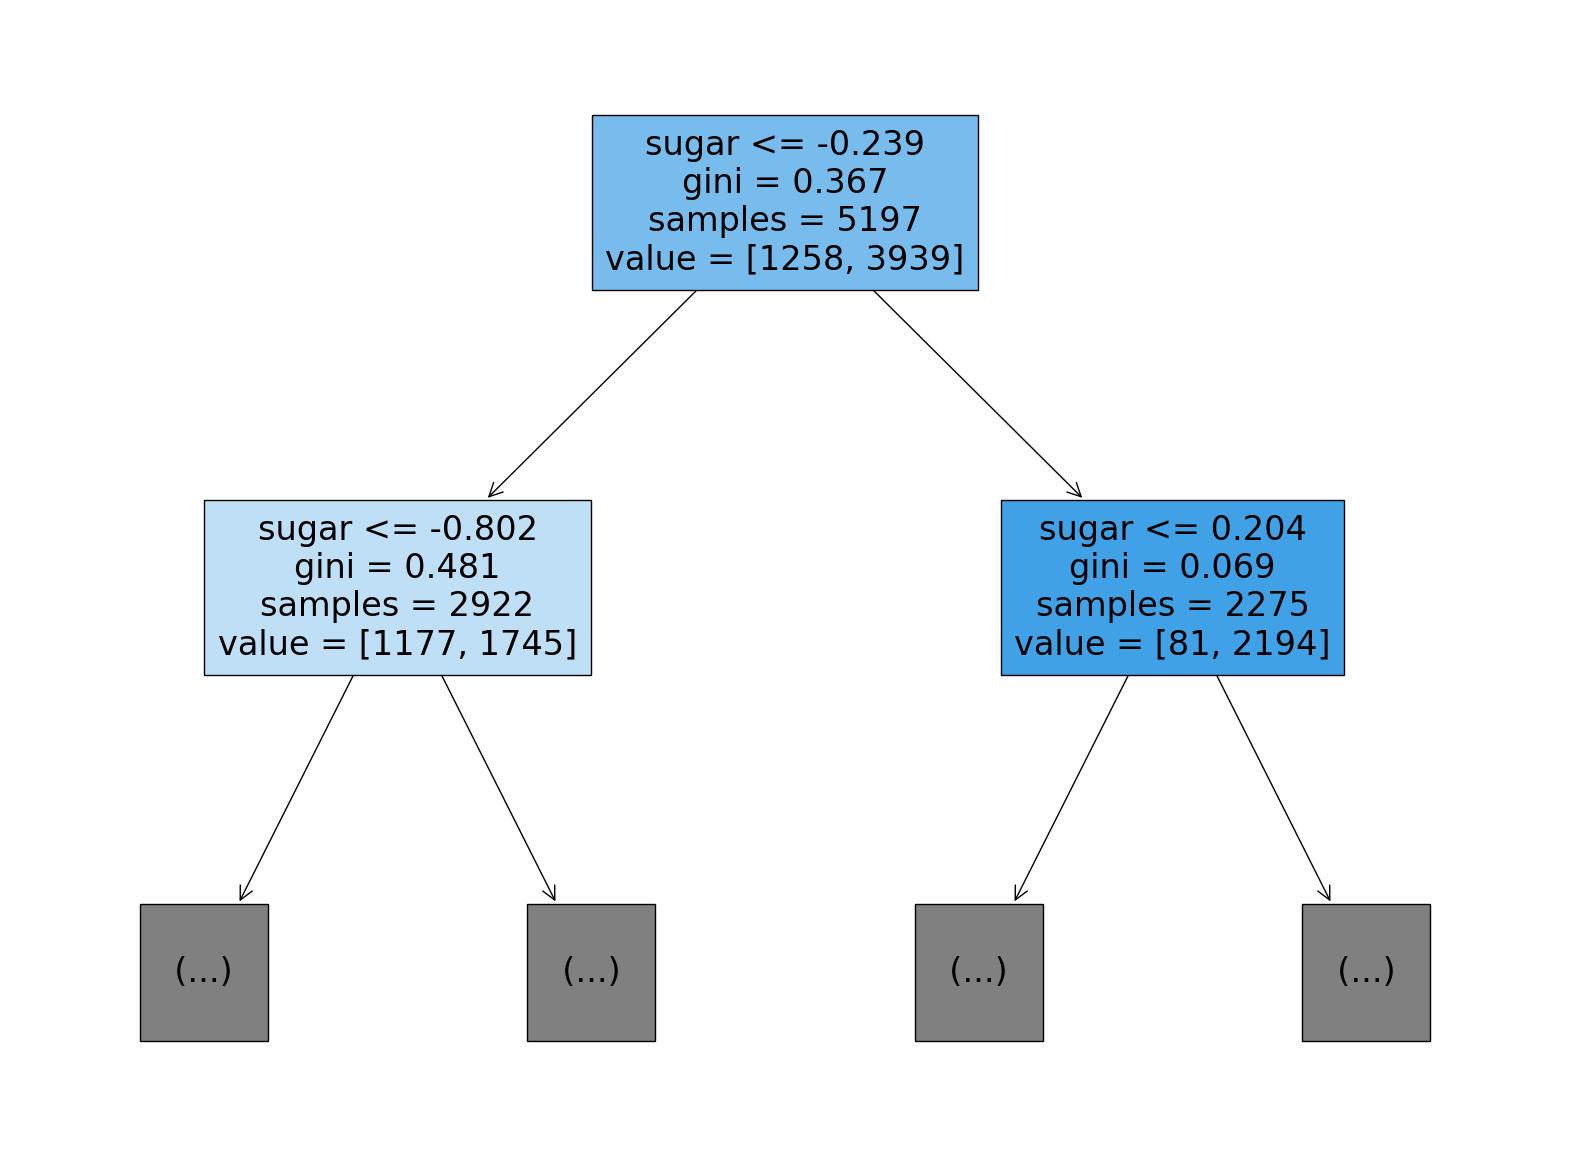

In [24]:
# 문제 1
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

import pandas  as pd
import matplotlib.pyplot as plt

wine = pd.read_csv('wine.csv')
data = wine[['alcohol', 'sugar','pH']].to_numpy()
target = wine['class'].to_numpy()
train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

dt = DecisionTreeClassifier(criterion='gini', random_state=42)
dt.fit(train_scaled, train_target)

plt.figure(figsize=(20, 15))
plot_tree(dt, max_depth=1, filled=True,
    feature_names=['alcohol', 'sugar', 'pH'])
dt = DecisionTreeClassifier(max_depth=5, random_state=42, min_samples_leaf=10)
dt.fit(train_scaled, train_target)

print("train_score: ",dt.score(train_scaled, train_target))
print("test_score: ",dt.score(test_scaled, test_target))

In [34]:
# 문제 2
from sklearn.manifold import MDS
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE


import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import plotly.graph_objects as go

def make_daegu(N=1000, rseed=42) : 
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'DAEGU', va = 'center',
            ha = 'center', weight = 'bold', size = 85)
    fig.savefig('daegu.png')
    plt.close(fig)
    from matplotlib.image import imread
    data = imread('daegu.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4* N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]
X = make_daegu(1000)

def random_projection(X, dimension=3, rseed=42) :
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
X1 = random_projection(X, 3)
X1.shape


fig = go.Figure()
fig.add_trace(go.Scatter3d(x=X1[:,0], y=X1[:,1], z = X1[:,2],
    opacity=0.3, mode = 'markers',
    marker = dict(size=5, color=X1[:,2], colorscale='Viridis')))
fig.update_layout(height = 800, width = 800)



def make_daegu_s_curve(X) : 
    t = (X[:,0] -2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T
XS = make_daegu_s_curve(X)

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=XS[:,0], y=XS[:,1], z=XS[:,2],
    opacity=0.8, mode = 'markers',
    marker=dict(size=5, color=XS[:,2], colorscale='Viridis')))
fig.update_layout(height=500)
fig.show()

t_sne = TSNE(n_components=2, perplexity=40)
sne_out = t_sne.fit_transform(XS)
fig = go.Figure()
fig.add_trace(go.Scatter(x=sne_out[:,0], y=sne_out[:,1],
    mode='markers',
    marker=dict(size=5, color=sne_out[:,0], colorscale='Viridis')))
fig.update_layout(height=400, width=400)
fig.show()

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\user\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [ ]:
# 문제 3
